In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [81]:
df=pd.read_csv('clean_final_data.csv')
df.head()

,Unnamed: 0,open,high,low,close,volume,date_parsed,cont_len,cont_pol,cont_sent,date_year,date_month,date_day,sent_neg,sent_neu,sent_pos,target_variable
0,0,1358.98,1374.71,1358.98,1368.70,593003200.0,2012-04-11,108.142857,0.01,Positive,2012,4,11,0,0,1,0
1,1,1368.77,1388.13,1368.77,1387.56,547368832.0,2012-04-12,75.000000,0.11,Positive,2012,4,12,0,0,1,1
2,2,1387.61,1387.61,1369.85,1370.26,631237824.0,2012-04-13,73.000000,0.00,Neutral,2012,4,13,0,1,0,0
3,3,1370.27,1379.66,1365.38,1369.57,596952128.0,2012-04-16,188.500000,0.13,Positive,2012,4,16,0,0,1,0
4,4,1369.57,1392.76,1369.57,1390.78,566529216.0,2012-04-17,235.529412,0.10,Positive,2012,4,17,0,0,1,1


In [82]:
df['date_parsed'] = pd.to_datetime(df['date_parsed'],format="%Y-%m-%d")

In [83]:
df.columns

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'date_parsed',
       'cont_len', 'cont_pol', 'cont_sent', 'date_year', 'date_month',
       'date_day', 'sent_neg', 'sent_neu', 'sent_pos', 'target_variable'],
      dtype='object')

In [84]:
df.index

RangeIndex(start=0, stop=1637, step=1)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       1637 non-null   int64         
 1   open             1637 non-null   float64       
 2   high             1637 non-null   float64       
 3   low              1637 non-null   float64       
 4   close            1637 non-null   float64       
 5   volume           1637 non-null   float64       
 6   date_parsed      1637 non-null   datetime64[ns]
 7   cont_len         1637 non-null   float64       
 8   cont_pol         1637 non-null   float64       
 9   cont_sent        1637 non-null   object        
 10  date_year        1637 non-null   int64         
 11  date_month       1637 non-null   int64         
 12  date_day         1637 non-null   int64         
 13  sent_neg         1637 non-null   int64         
 14  sent_neu         1637 non-null   int64  

In [86]:
X=df.drop(columns=['Unnamed: 0','date_parsed','target_variable','cont_sent'])
y=df['target_variable']

In [87]:
y.value_counts()

1    885
0    752
Name: target_variable, dtype: int64

In [88]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [89]:
print(model.feature_importances_)

[0.13208405 0.10452694 0.10320696 0.12748348 0.12252589 0.11146856
 0.08650029 0.02214165 0.07069788 0.11177219 0.00275136 0.00150893
 0.00333182]


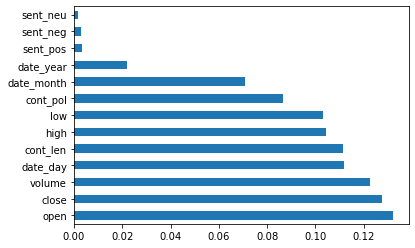

In [90]:
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(13).plot(kind='barh')
plt.show()

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X=df.drop(columns=['date_parsed','target_variable','cont_sent'])
y=df['target_variable']

In [93]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30,random_state=0)

In [94]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [95]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [96]:
prediction=log_model.predict(X_test)

In [97]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       218\n           1       0.56      1.00      0.72       274\n\n    accuracy                           0.56       492\n   macro avg       0.28      0.50      0.36       492\nweighted avg       0.31      0.56      0.40       492\n'

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[  0, 218],
       [  0, 274]])

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.556910569105691

### Hyperparameter tuning 
1.GridSearchCV

2.RandomizedSearchCV

3.Bayesian Optimization-Automate Hyperparameter Tuning (Hyperopt)

4.Sequential model based optimization

5.Optuna-Automate Hyperparameter Tuning

6.Genetic Algorithm


The main parameter used by logistic regression are:

    penalty--> it is used for handle the overfitting and underfitting
    
    tol---->Tolerance for stopping criteria.
    
    C------>Inverse of regularization strength
    
    solver---->Algorithm to use in the optimization problem.
    
    max_iter---->Maximum number of iterations taken for the solvers to converge
    
    verbose--->To see the progess
    
    n_jobs---->Number of CPU cores used when parallelizing over classes

In [100]:
from sklearn.model_selection import RandomizedSearchCV
penalty=['l1', 'l2', 'elasticnet', 'none']
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter=[100,200,300,350]
random_grid={'penalty':penalty,
             'solver':solver,
             'max_iter':max_iter,
             }

print(random_grid)

{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 200, 300, 350]}


In [101]:
lg=LogisticRegression()
lg_randomcv=RandomizedSearchCV(estimator=lg,param_distributions=random_grid,cv=3,n_jobs=-1,random_state=100,
                               verbose=2)
lg_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    1.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.5s finished


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'max_iter': [100, 200, 300, 350],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100, verbose=2)

In [102]:
lg_randomcv.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200}

In [103]:
best_random_grid=lg_randomcv.best_params_

In [104]:
pred=lg_randomcv.predict(X_test)
print(confusion_matrix(y_test,pred))

[[195  23]
 [ 20 254]]


In [105]:
print("Accuracy Score is",accuracy_score(y_test,pred))

Accuracy Score is 0.9126016260162602


In [106]:
print("Accuracy on Testing Data",lg_randomcv.score(X_test,y_test))
print("Accuracy on Training Data",lg_randomcv.score(X_train,y_train))

Accuracy on Testing Data 0.9126016260162602
Accuracy on Training Data 0.9091703056768559


<!-- Accuracy in both case have almost same. so,our model is Fine. -->